In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [4]:
start = '2010-01-01'
end = '2021-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433318
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.586868
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.551132
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.640778
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.465637
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,176.838257


In [6]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433318
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [8]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


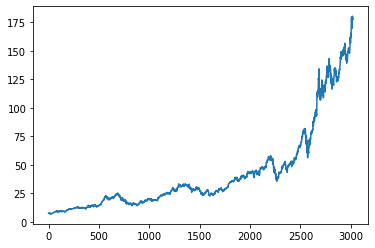

In [9]:
plt.plot(df.Close)

In [10]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
3017,180.419998,177.070007,177.089996,180.330002,74919600.0
3018,181.330002,178.529999,180.160004,179.289993,79144300.0
3019,180.630005,178.139999,179.330002,179.380005,62348900.0
3020,180.570007,178.089996,179.470001,178.199997,59773000.0


In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3017    153.3444
3018    153.6667
3019    153.9991
3020    154.3202
3021    154.6399
Name: Close, Length: 3022, dtype: float64

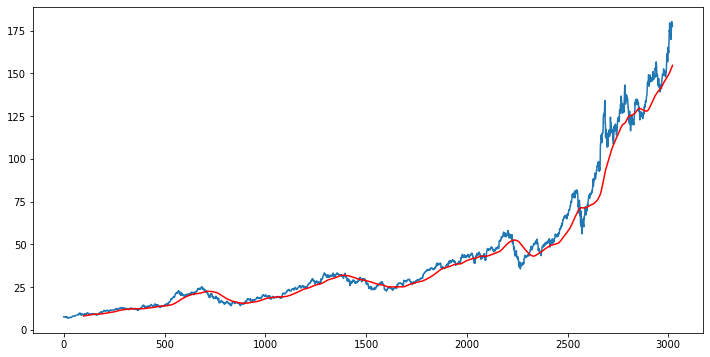

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3017    142.85570
3018    143.13220
3019    143.40125
3020    143.66845
3021    143.95365
Name: Close, Length: 3022, dtype: float64

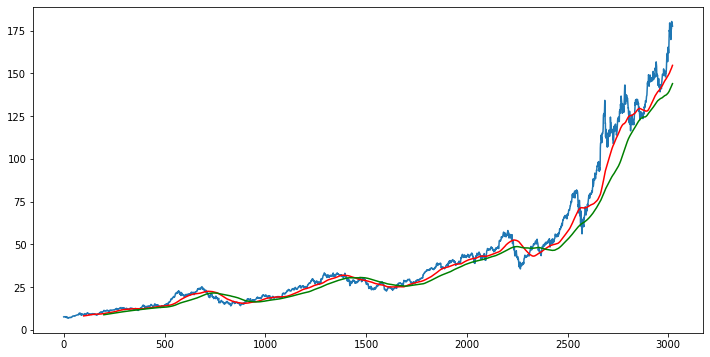

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [16]:
df.shape

(3022, 5)

In [18]:
#Splitting Data into Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2115, 1)
(907, 1)


In [19]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [20]:
data_testing.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01641142],
       [0.0192931 ],
       [0.01961817],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [24]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
x_train.shape

(2015, 100, 1)

In [25]:
#ML model

In [29]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [31]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [34]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
63/63 [==============================] - 28s 310ms/step - loss: 0.0469
Epoch 2/50
63/63 [==============================] - 19s 304ms/step - loss: 0.0081
Epoch 3/50
63/63 [==============================] - 19s 302ms/step - loss: 0.0069
Epoch 4/50
63/63 [==============================] - 19s 303ms/step - loss: 0.0060
Epoch 5/50
63/63 [==============================] - 19s 302ms/step - loss: 0.0058
Epoch 6/50
63/63 [==============================] - 19s 304ms/step - loss: 0.0055
Epoch 7/50
63/63 [==============================] - 19s 303ms/step - loss: 0.0049
Epoch 8/50
63/63 [==============================] - 19s 306ms/step - loss: 0.0050
Epoch 9/50
63/63 [==============================] - 19s 305ms/step - loss: 0.0051
Epoch 10/50
63/63 [==============================] - 19s 302ms/step - loss: 0.0049
Epoch 11/50
63/63 [==============================] - 19s 303ms/step - loss: 0.0049
Epoch 12/50
63/63 [==============================] - 20s 317ms/step - loss: 0.0041
Epoch 13/50
6

In [36]:
model.save('keras_model.h5')

In [37]:
data_testing.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [38]:
data_training.tail(100)

,Close
2015,43.057499
2016,43.257500
2017,43.750000
2018,43.587502
2019,43.582500
...,...
2110,46.907501
2111,46.790001
2112,47.090000
2113,47.037498


In [39]:
past_100_days = data_training.tail(100)

In [40]:
final_df = past_100_days.append(data_training, ignore_index=True)

C:\Users\ARUP SARKAR\AppData\Local\Temp\ipykernel_6332\706827715.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_training, ignore_index=True)


In [41]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [42]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.8904703 ],
       [0.89539024],
       [0.90750555],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [43]:
input_data.shape

(2215, 1)

In [44]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [45]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(2115, 100, 1)
(2115,)


In [46]:
# Making Predictions

y_predicted = model.predict(x_test)

In [47]:
y_predicted.shape

(2115, 1)

In [48]:
y_test

array([0.01641142, 0.0192931 , 0.01961817, ..., 0.98966821, 0.98837669,
       0.9910212 ])

In [49]:
y_predicted

array([[0.95255077],
       [0.945392  ],
       [0.9288467 ],
       ...,
       [0.95286477],
       [0.9527513 ],
       [0.95256543]], dtype=float32)

In [50]:
scaler.scale_

array([0.0245996])

In [51]:
scale_factor = 1/0.0245996
y_predicted = y_predicted * scale_factor
y_test = y_test* scale_factor

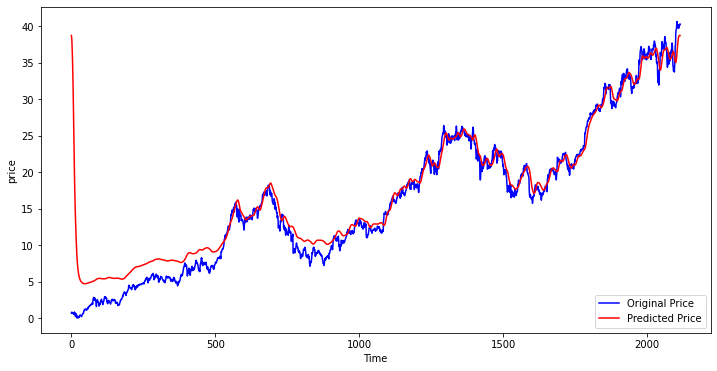

In [53]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()